In [2]:
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoAlertPresentException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.keys import Keys

import pandas as pd

from pymongo import MongoClient
import pandas as pd

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import time
import pprint

import datetime
from datetime import timedelta, date, time

import numpy as np
import matplotlib.pyplot as plt

In [125]:
webdriver = "/Users/kathrynjohnson/Downloads/chromedriver"

driver = Chrome(webdriver)

In [126]:
login_url = "https://myaccount.nytimes.com/auth/login"

driver.get(login_url)

html_source = driver.page_source

In [127]:

request_url = 'https://www.nytimes.com/crosswords'

driver.get(request_url)

html_source = driver.page_source

print(len(html_source))

2950353


In [128]:
test_url = 'https://www.nytimes.com/crosswords/game/daily/2020/03/27'

driver.get(test_url)

html_source = driver.page_source

clue_element = driver.find_elements_by_class_name("Clue-text--3lZl7")
clue = [x.text for x in clue_element]


In [129]:
test_url = 'https://www.nytimes.com/crosswords/game/daily/2020/04/01'

driver.get(test_url)

html_source = driver.page_source

author_element = driver.find_elements_by_class_name("PuzzleDetails-byline--16J5w")
for x in author_element:
    byline = x.text[16:]
    byline_split = byline.split('Edited')
    author = byline_split[0]
#split = x.text[16:].split('Edited') for x in author_element
author

'JOHN FICARRA AND PATRICK MERRELL'

In [ ]:
['The CrosswordBy KYLE DOLANEdited by WILL SHORTZ']

In [ ]:
[['The CrosswordBy KYLE DOLAN', ' by WILL SHORTZ']]

In [178]:
url = "https://www.nytimes.com/crosswords/game/daily/2020/01/26"
driver.get(url)
driver.switch_to.frame(driver.find_element_by_id("_mN_cksync_0"))
html_source = driver.page_source
html_source

'<html><head></head> <body marginwidth="0" marginheight="0"> <script type="text/javascript">try{\nvar cookieSyncConfig = {"datalen":61,"visitor":{"vsCk":"visitor-id","vsDaCk":"data","sepVal":"|","sepTime":"*","sepCs":"~~","vsDaTime":31536000,"visitorId":"1730971936623074000V10","cc":"US","zone":" e "},"cs":"1","lookup":{"apx":{"name":"apx","time":89,"cookie":"data-a","urls":[{"type":"img","url":"https:\\/\\/ib.adnxs.com\\/getuid?https%3A%2F%2Fcontextual.media.net%2Fcksync.php%3Fcs%3D1%26vsid%3D%3Cvsid%3E%26type%3Dapx%26refUrl%3D%3CrefUrl%3E%26vid%3D%3Cvid%3E%26ovsid%3D%24UID"}],"pvid":2,"purge":["setstatuscode"]},"rbcn":{"name":"rbcn","time":180,"cookie":"data-r","urls":[{"type":"iframe","url":"https:\\/\\/secure-assets.rubiconproject.com\\/utils\\/xapi\\/multi-sync.html?p=medianet"}],"pvid":29},"opx":{"name":"opx","time":364,"cookie":"data-o","urls":[{"type":"img","url":"https:\\/\\/us-u.openx.net\\/w\\/1.0\\/cm?id=78e2dffc-bb89-4bb2-ae92-f592d006518b&ph=6a16560a-f6c6-4851-b7b5-0b2c01

In [179]:

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

puzzle_dict = {}
start_date = date(2017, 1, 1)
end_date = date(2019, 1, 27)

for single_date in daterange(start_date, end_date):
    url = "https://www.nytimes.com/crosswords/game/daily/" + single_date.strftime("%Y/%m/%d") + "/"
    driver.get(url)
    clue_element = driver.find_elements_by_class_name("Clue-text--3lZl7")
    clue = [x.text for x in clue_element]
    author_element = driver.find_elements_by_class_name("PuzzleDetails-byline--16J5w")
    for x in author_element:
        byline = x.text[16:]
        byline_split = byline.split('Edited')
        author = byline_split[0]
    timer_element = driver.find_elements_by_class_name('timer-count')
    timer = [x.text for x in timer_element]
    puzzle_dict[single_date.strftime("%Y-%m-%d")] = (timer[0], author, clue)
    time.sleep(15)
print(puzzle_dict)


{'2020-01-26': ('22:55', 'g"By ERIK AGARD', ['It got some "Xtra" flavor in 2001', 'San Antonio pro', 'Atkins diet no-no', "What's called a cashpoint by Brits", 'Wage ___', 'Add to the team', '___ squash', 'One-named singer with the 2014 hit "Chandelier"', '*Looks that can be difficult to pull off', '*"It\'s 2 a.m. already?!"', 'Half up-front?', 'Tikka masala go-with', 'Gravitate (toward)', 'Singer Morissette', 'Actress de Armas of "Knives Out"', '"How was ___ know?"', 'Place for speakers', 'Trig function', '*Data visuals similar to histograms', '*Swimming hazards in the ocean', 'Crossword-loving detective on "Brooklyn Nine-Nine"', '___ Dhabi', 'Celebrations of lives, for short', 'Dance arrangements, familiarly', 'One making frequent pitching changes?', 'Back of the neck', "It's spoken in Aberdeen", '"Who ___ knows?"', 'Elderly', '"I call dibs!"', "[I'm mad!]", 'Honor for a play', 'Place in the earth', 'South African currency', 'Operatic showpiece', '*"Man, that was cheap!"', '*Holder o

In [141]:
pd.DataFrame.from_dict(puzzle_dict, orient='index', columns=['solve_time', 'author', 'clues'])

,solve_time,author,clues
2020-01-27,6:39,TIMOTHY POLIN,"[iPhone downloads, Breakfast, lunch and dinner..."
2020-01-28,5:48,TRENTON CHARLSON,"[Sigh of satisfaction, Longtime SeaWorld attra..."


{'2020-01-25': ['18:33'], '2020-01-26': ['0:00'], '2020-01-27': ['6:39'], '2020-01-28': ['5:48'], '2020-01-29': ['11:10']}
CPU times: user 33.8 ms, sys: 9.03 ms, total: 42.9 ms
Wall time: 1min 37s

{'2020-01-15': ['10:03'], '2020-01-16': ['20:22'], '2020-01-17': ['11:33'], '2020-01-18': ['11:46'], '2020-01-19': ['35:18'], '2020-01-20': ['6:48'], '2020-01-21': ['9:52'], '2020-01-22': ['14:56'], '2020-01-23': ['15:32'], '2020-01-24': ['15:52'], '2020-01-25': ['18:33'], '2020-01-26': ['0:00'], '2020-01-27': ['6:39'], '2020-01-28': ['5:48'], '2020-01-29': ['11:10']}

In [ ]:
crossword_url = "https://www.nytimes.com/crosswords/game/daily/2020/02/20"

driver.get(crossword_url)
driver.implicitly_wait(10)
html_source = driver.page_source

print(len(html_source))

In [28]:
pages = 1

for page in range(1,pages):

    url = "https://www.nytimes.com/crosswords/game/daily/2020/04/" + str(page) + "/"

    driver.get(url) 

    #items = len(driver.find_elements_by_class_name("timer-count"))

    #total = []
    #for item in range(items):
    timers = driver.find_elements_by_class_name("timer-count")
    print(timers)[0]
            #time = timer.find_element_by_class_name('text').text
            #author = quote.find_element_by_class_name('author').text
            #new = ((quote_text,author))
            #total.append(time)
    #df = pd.DataFrame(total,columns=['quote','author'])
    #df.to_csv('quoted.csv')
    break
#driver.close()



pages = 3

for page in range(1,pages):

    url = "https://www.nytimes.com/crosswords/game/daily/2020/04/" + str(page) + "/"

    driver.get(url) 

    items = len(driver.find_elements_by_class_name("timer-count"))

    total = []
    for item in range(items):
        timers = driver.find_elements_by_class_name("timer-count")
        print(timers)
            #time = timer.find_element_by_class_name('text').text
            #author = quote.find_element_by_class_name('author').text
            #new = ((quote_text,author))
            #total.append(time)
    df = pd.DataFrame(total,columns=['quote','author'])
    df.to_csv('quoted.csv')
driver.close()

In [ ]:
bbb

In [ ]:
    driver.switch_to.frame(driver.find_element_by_id("_mN_cksync_0"))
    driver.find_element_by_class_name('buttons-modalButton--1REsR buttons-startBtn--3OK72').send_keys(Keys.ENTER)
    driver.switch_to_default_content()
    #WebDriverWait.until(EC.visibilityOfElementLocated(By.xpath("//button[text()='OK']")));
    #WebDriverWAit.until(EC.elementToBeClickable(By.xpath("//button[text()='OK']")));
    #driver.findElement(By.xpath("//button[text()='OK']")).click();

NameError: name 'strptime' is not defined

In [8]:
time_string = "01:01:09"

date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")

a_timedelta = date_time - datetime.datetime(1900, 1, 1)
seconds = a_timedelta.total_seconds()

seconds

3669.0

In [ ]:
def daterange(start_date, end_date):

    for n in range(int ((end_date - start_date).days)):

        yield start_date + timedelta(n)

In [ ]:
pages = 5

timer_dict = {}

for page in range(1,pages):

    url = "https://www.nytimes.com/crosswords/game/daily/2020/03/" + str(page) + "/"
    driver.get(url) 
    driver.implicitly_wait(30)
    #time.sleep(30)
    timer_element = driver.find_elements_by_class_name('timer-count')
    timer = [x.text for x in timer_element]
    timer_dict["2020/03/" + str(page)] = timer
    driver.implicitly_wait(60)
    time.sleep(30)
print(timer_dict)

In [11]:
df = pd.read_csv('puzzledata.csv')

In [14]:
df = df.drop(columns = 'Unnamed: 0')

In [15]:
df

,date,solve time (seconds),author,clues,day
0,2017-01-01,2033.0,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre...",Sunday
1,2017-01-02,530.0,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often...",Monday
2,2017-01-03,630.0,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th...",Tuesday
3,2017-01-04,1217.0,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",...",Wednesday
4,2017-01-05,1091.0,ED SESSA,"['Half of a Wall Street firm since 1882', 'One...",Thursday
...,...,...,...,...,...
725,2018-12-27,670.0,JEFF CHEN and MARY LOU GUIZZO,"['___ billiards, game on a pocketless table', ...",Thursday
726,2018-12-28,773.0,DAVID STEINBERG,"['Dominant figure', 'High-end Italian sports c...",Friday
727,2018-12-29,829.0,ROBYN WEINTRAUB,"['First digit', 'Beam at?', '4.93 milliliters:...",Saturday
728,2018-12-30,1945.0,LUKE VAUGHN,"['Fixture on a ski lodge deck', 'Sound quality...",Sunday


In [52]:
grouped = df.groupby('day', 'author')

ValueError: No axis named author for object type <class 'pandas.core.frame.DataFrame'>

In [21]:
times_by_day = grouped.aggregate(np.mean)

In [23]:
times_by_day

,solve time (seconds)
day,
Friday,1385.846154
Monday,703.819048
Saturday,1675.855769
Sunday,2731.152381
Thursday,1381.711538
Tuesday,1039.826923
Wednesday,1174.528846


In [51]:
sorted_days = times_by_day.sort_values('solve time (seconds)')
sorted_days

,solve time (seconds)
day,
Monday,703.819048
Tuesday,1039.826923
Wednesday,1174.528846
Thursday,1381.711538
Friday,1385.846154
Saturday,1675.855769
Sunday,2731.152381


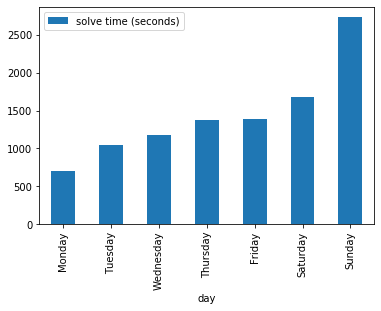

In [50]:
sorted_days.plot.bar()

In [55]:
df_sort = df.sortby('author')

AttributeError: 'DataFrame' object has no attribute 'sortby'

In [325]:
df = pd.read_csv('puzzles_17_18_19.csv')

In [326]:
df

,date,solve_secs,day,author,clues
0,2017-01-01,2033.0,Sunday,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre..."
1,2017-01-02,530.0,Monday,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often..."
2,2017-01-03,630.0,Tuesday,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th..."
3,2017-01-04,1217.0,Wednesday,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",..."
4,2017-01-05,1091.0,Thursday,ED SESSA,"['Half of a Wall Street firm since 1882', 'One..."
...,...,...,...,...,...
1090,2019-12-27,1036.0,Friday,SAM TRABUCCO,"['Cracker boxes?', 'Criticized continuously', ..."
1091,2019-12-28,1178.0,Saturday,ROBYN WEINTRAUB,"['Where hands go in the Time Warp dance', ""Bak..."
1092,2019-12-29,1569.0,Sunday,ANDREW CHAIKIN,"['Reveal, as a plot twist', ""Hit 1980s-'90s sh..."
1093,2019-12-30,493.0,Monday,GARY LARSON,"['___ Wednesday', 'Doing battle', 'Item in a h..."


In [59]:
df_Sun = df[df['day'] == 'Sunday']
df_Mon = df[df['day'] == 'Monday']
df_Tues = df[df['day'] == 'Tuesday']
df_Wed = df[df['day'] == 'Wednesday']
df_Thurs = df[df['day'] == 'Thursday']
df_Fri = df[df['day'] == 'Friday']
df_Sat = df[df['day'] == 'Saturday']

In [176]:
df_Sun

,date,solve_secs,day,author,clues
0,2017-01-01,2033.0,Sunday,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre..."
7,2017-01-08,1904.0,Sunday,ERIK AGARD and PETER BRODA,"['Loops in, in a way', 'Goddess with a throne ..."
14,2017-01-15,1814.0,Sunday,JOEL FAGLIANO,"['Kind of kick', 'Product of evaporation', 'Ap..."
21,2017-01-22,2318.0,Sunday,DAN SCHOENHOLZ,"['Inconceivably vast', 'Hard looks', 'Stream, ..."
28,2017-01-29,1715.0,Sunday,JIM HYRES and DAVID STEINBERG,"['One side of a 69-Across showdown', 'Strip of..."
...,...,...,...,...,...
1064,2019-12-01,1900.0,Sunday,PATRICK MERRELL,"['Bird growing up Down Under', 'Russian noveli..."
1071,2019-12-08,1192.0,Sunday,EMILY CARROLL,"['Unpleasantly surprise', 'Music-licensing org..."
1078,2019-12-15,1024.0,Sunday,JEFF CHEN and CHRISTINA IVERSON,"['Sandwich with an apostrophe in its name', 'L..."
1085,2019-12-22,1213.0,Sunday,LAURA TAYLOR KINNEL,"['TV screen inits.', 'Steinful', 'Cut (off)', ..."


In [110]:
sun_cycle = df_Sun.groupby('author', as_index = False).mean()
mon_cycle = df_Mon.groupby('author', as_index = False).mean()
tues_cycle = df_Tues.groupby('author', as_index = False).mean()
wed_cycle = df_Wed.groupby('author', as_index = False).mean()
thurs_cycle = df_Thurs.groupby('author', as_index = False).mean()
fri_cycle = df_Fri.groupby('author', as_index = False).mean()
sat_cycle = df_Sat.groupby('author', as_index = False).mean()

In [182]:
sun_cycle
mon_cycle

,author,solve_secs
0,ALAN ARBESFELD,542.333333
1,ALAN DELORIEA,514.000000
2,ALEX EATON-SALNERS,856.500000
3,ALEX EYLAR,390.000000
4,ALI GASCOIGNE,683.000000
...,...,...
86,TRACY GRAY and JEFF CHEN,514.000000
87,TRENT H. EVANS,378.666667
88,TRENTON CHARLSON,947.000000
89,ZHOUQIN BURNIKEL,507.285714


In [179]:
sun_list = sun_cycle['author'].to_list()
mon_list = mon_cycle['author'].to_list()
tues_list = tues_cycle['author'].to_list()
wed_list = wed_cycle['author'].to_list()
thurs_list = thurs_cycle['author'].to_list()
fri_list = fri_cycle['author'].to_list()
sat_list = sat_cycle['author'].to_list()

In [195]:
sun_list = [x[:-1] for x in sun_list]

In [175]:
set(sun_list) & set(mon_list) & set(tues_list) & set(wed_list) & set(thurs_list) & set(fri_list) & set(sat_list) & set(sun_list)

{'DAVID STEINBERG', 'ERIK AGARD', 'PETER A. COLLINS', 'ZHOUQIN BURNIKEL'}

In [ ]:
df_Sun = df[df['day'] == 'Sunday']
df_Mon = df[df['day'] == 'Monday']
df_Tues = df[df['day'] == 'Tuesday']
df_Wed = df[df['day'] == 'Wednesday']
df_Thurs = df[df['day'] == 'Thursday']
df_Fri = df[df['day'] == 'Friday']
df_Sat = df[df['day'] == 'Saturday']

In [327]:
df17 = df.iloc[:365,:]
df18 = df.iloc[365:730,:]
df19 = df.iloc[730:, :]

df17

,date,solve_secs,day,author,clues
0,2017-01-01,2033.0,Sunday,MATTHEW SEWELL,"['Sponged', 'Asylum', 'Takes from page to scre..."
1,2017-01-02,530.0,Monday,CHUCK DEODENE,"[""Leatherworker's tool"", 'Wrath', 'Sauce often..."
2,2017-01-03,630.0,Tuesday,MICHAEL SHTEYMAN,"['Misgiving', 'Small quarrel', 'Leader from th..."
3,2017-01-04,1217.0,Wednesday,SAMUEL A. DONALDSON,"['Bee ball?', 'Somewhat', ""Historian's focus"",..."
4,2017-01-05,1091.0,Thursday,ED SESSA,"['Half of a Wall Street firm since 1882', 'One..."
...,...,...,...,...,...
360,2017-12-27,1243.0,Wednesday,DAVID KWONG,"[""Slugger's stat"", 'Shout from a coach driver'..."
361,2017-12-28,1137.0,Thursday,GARY LARSON,"['1970s New York City mayor', 'Meat that comes..."
362,2017-12-29,1811.0,Friday,DAVID STEINBERG,"['Checks for bugs', 'Dealt (with)', 'Percocet ..."
363,2017-12-30,1019.0,Saturday,DAMON GULCZYNSKI,"['Colorful pullovers', ""Party host's convenien..."


In [328]:
df17.to_csv('puzzle17.csv', index = False)
df18.to_csv('puzzle18.csv', index = False)
df19.to_csv('puzzle19.csv', index = False)

    

In [245]:
solves_17 = df17.groupby('day').mean()
solves_17 = solves_17.sort_values(by = 'solve_secs')

solves_18 = df18.groupby('day').mean()
solves_18 = solves_18.sort_values(by = 'solve_secs')

solves_19 = df19.groupby('day').mean()
solves_19 = solves_19.sort_values(by = 'solve_secs')


,solve_secs
day,
Monday,804.442308
Tuesday,1211.442308
Wednesday,1342.807692
Thursday,1618.788462
Friday,1648.038462
Saturday,2077.365385
Sunday,3114.132075


In [253]:
comp_17_18 = pd.concat([solves_17, solves_18], axis=1)

In [254]:
comp_17_18.columns = ['2017', '2018']

In [255]:
comp_17_18

,2017,2018
Monday,804.442308,605.094340
Tuesday,1211.442308,868.211538
Wednesday,1342.807692,1006.250000
Thursday,1618.788462,1144.634615
Friday,1648.038462,1123.653846
Saturday,2077.365385,1274.346154
Sunday,3114.132075,2340.807692


Text(0, 0.5, 'Solve Time (seconds)')

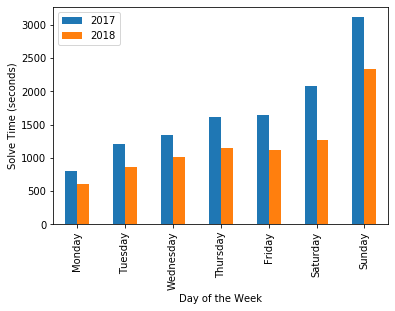

In [273]:
ax = comp_17_18.plot.bar()
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Solve Time (seconds)")

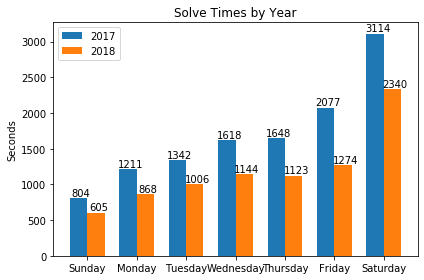

<Figure size 432x288 with 0 Axes>

In [329]:

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
means17 = comp_17_18['2017']
means18 = comp_17_18['2018']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means17, width, label='2017')
rects2 = ax.bar(x + width/2, means18, width, label='2018')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Seconds')
ax.set_title('Solve Times by Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = int(rect.get_height())
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2.5, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

plt.savefig('solve_times_17_18_v1.png')

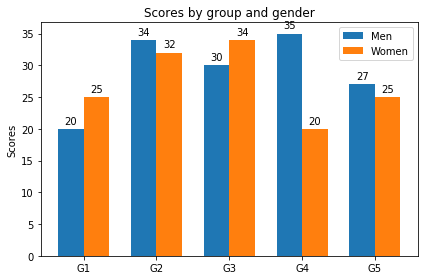

In [291]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

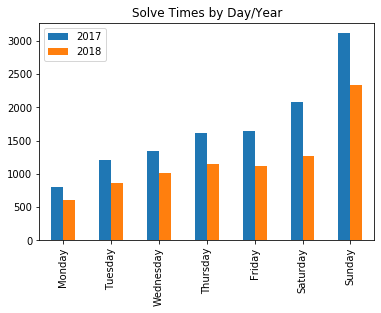

In [318]:
(comp_17_18[['2017', '2018']].plot(kind = 'bar', title = 'Solve Times by Day/Year', legend = True))

plt.savefig('solve_times_17_18_v2.png')